## Load libraries

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pylab import rcParams



In [2]:
from statsmodels.graphics.tsaplots import month_plot, plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose,STL
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

## load the data

In [3]:
df = pd.read_csv('/Users/amithmg/Documents/dsml/timeseries/Time Series Forecasting Monograph/Tractor-Sales.csv')

In [4]:
df.head()

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [5]:
timestamp = pd.date_range(start='2003-01-01',end='2015-01-01',freq='M')

In [6]:
df['Time_Stamp'] = timestamp

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Month-Year              144 non-null    object        
 1   Number of Tractor Sold  144 non-null    int64         
 2   Time_Stamp              144 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 3.5+ KB


In [8]:
df.drop(labels='Month-Year',axis=1,inplace=True)

In [9]:
df.head()

,Number of Tractor Sold,Time_Stamp
0,141,2003-01-31
1,157,2003-02-28
2,185,2003-03-31
3,199,2003-04-30
4,203,2003-05-31


In [10]:
df.set_index(keys='Time_Stamp',drop=True,inplace=True)

In [11]:
df.head()

,Number of Tractor Sold
Time_Stamp,
2003-01-31,141
2003-02-28,157
2003-03-31,185
2003-04-30,199
2003-05-31,203


In [12]:
rcParams['figure.figsize'] = 15, 8

<AxesSubplot:xlabel='Time_Stamp'>

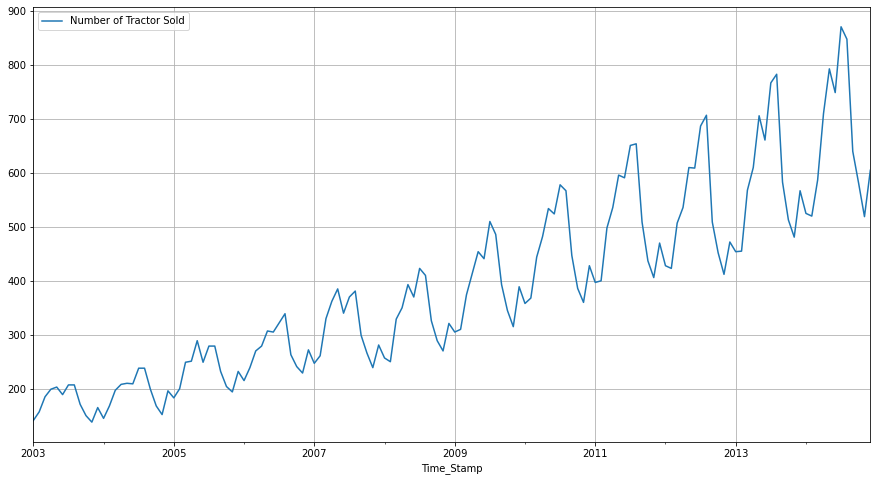

In [13]:
df.plot(grid = True)

## Plot: seasonal plot year wise

In [14]:
months = ['January','February','March','April',
         'May','June','July','August','September',
         'October','November','December']

In [15]:
yearly_sales_across_years = pd.pivot_table(df, values = 'Number of Tractor Sold',

                columns = df.index.year, index=df.index.month_name())

In [16]:
yearly_sales_across_years.head()

Time_Stamp,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Time_Stamp,,,,,,,,,,,,
April,199,208,251,279,362,350,414,482,536,536,610,710
August,207,238,279,339,381,410,486,567,654,707,783,848
December,165,196,232,272,281,321,389,428,470,472,567,605
February,157,168,200,239,261,250,310,368,400,423,455,520
January,141,145,183,215,247,257,305,358,397,428,454,525


In [17]:
yearly_sales_across_years = yearly_sales_across_years.reindex(index=months)

In [18]:
yearly_sales_across_years.head()

Time_Stamp,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Time_Stamp,,,,,,,,,,,,
January,141,145,183,215,247,257,305,358,397,428,454,525
February,157,168,200,239,261,250,310,368,400,423,455,520
March,185,197,249,270,330,329,374,444,498,507,568,587
April,199,208,251,279,362,350,414,482,536,536,610,710
May,203,210,289,307,385,393,454,534,596,610,706,793


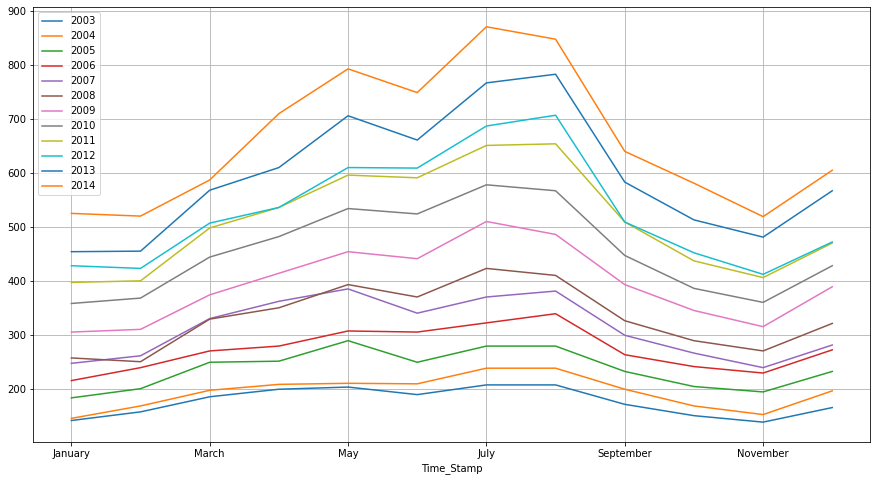

In [19]:
yearly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best')

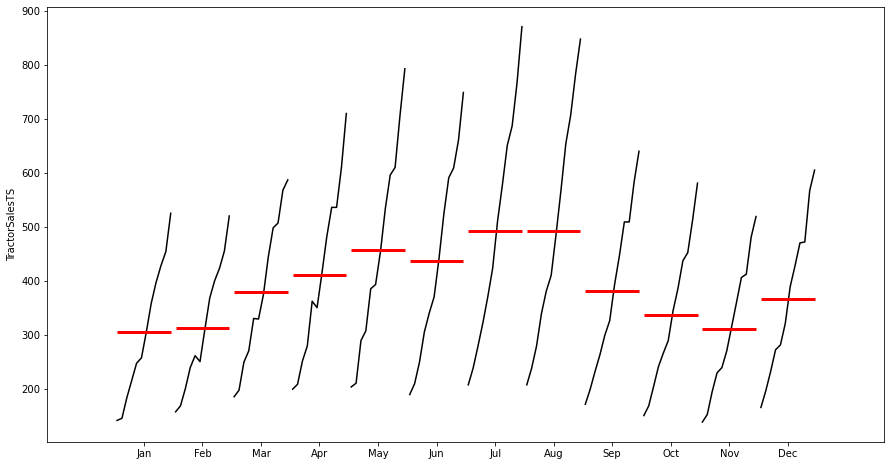

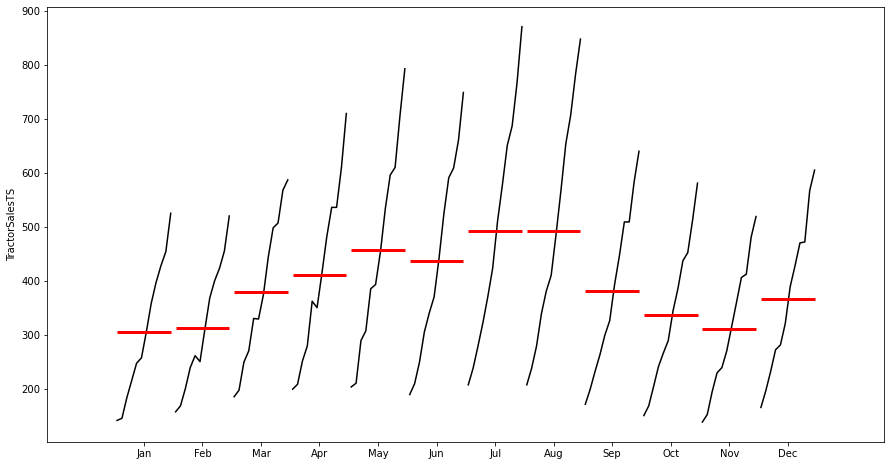

In [20]:
month_plot(df, ylabel='TractorSalesTS')

## decomposition of time Series 

#### Moving Average Method

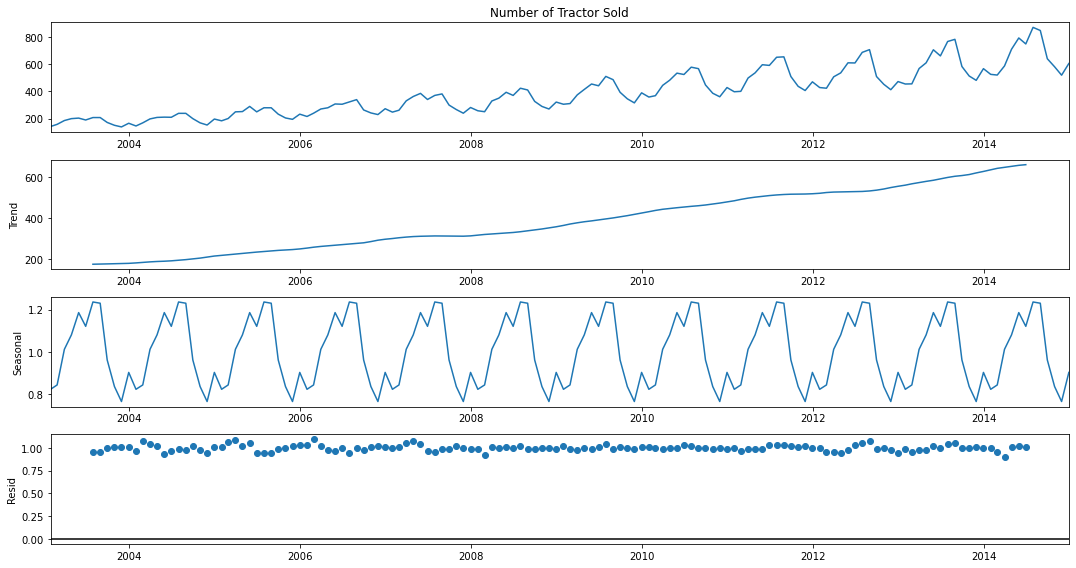

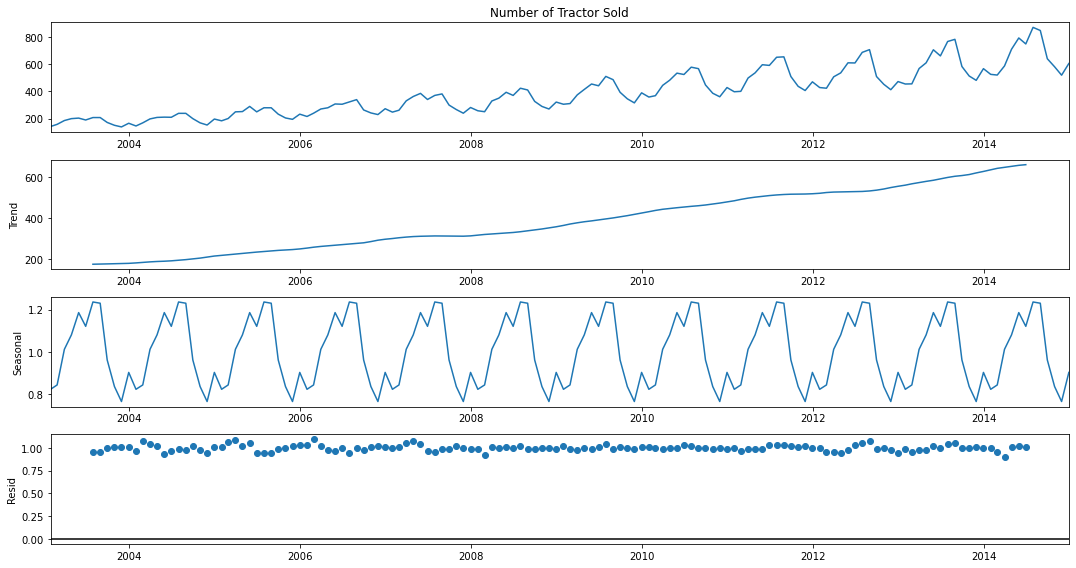

In [21]:
decomposition = seasonal_decompose(df['Number of Tractor Sold'],
                                  model='multiplicative')

decomposition.plot()

Observing seasonal indices

In [22]:
Seasonal_Ind = pd.DataFrame({'Jan':round(decomposition.seasonal.head(12),2).values[0],
                            'Feb':round(decomposition.seasonal.head(12),2).values[1],
                            'Mar':round(decomposition.seasonal.head(12),2).values[2],
                            'Apr':round(decomposition.seasonal.head(12),2).values[3],
                            'May':round(decomposition.seasonal.head(12),2).values[4],
                            'Jun':round(decomposition.seasonal.head(12),2).values[5],
                            'Jul':round(decomposition.seasonal.head(12),2).values[6],
                            'Aug':round(decomposition.seasonal.head(12),2).values[7],
                            'Sep':round(decomposition.seasonal.head(12),2).values[8],
                            'Oct':round(decomposition.seasonal.head(12),2).values[9],
                            'Nov':round(decomposition.seasonal.head(12),2).values[10],
                            'Dec':round(decomposition.seasonal.head(12),2).values[11]},
                           index=range(1,2))

In [23]:
Seasonal_Ind

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1,0.82,0.84,1.01,1.08,1.19,1.12,1.24,1.23,0.96,0.84,0.77,0.9


## Using decomposition of Trend and Seasonality

In [24]:
decomposition = STL(np.log10(df['Number of Tractor Sold']),
                   seasonal = 13).fit()

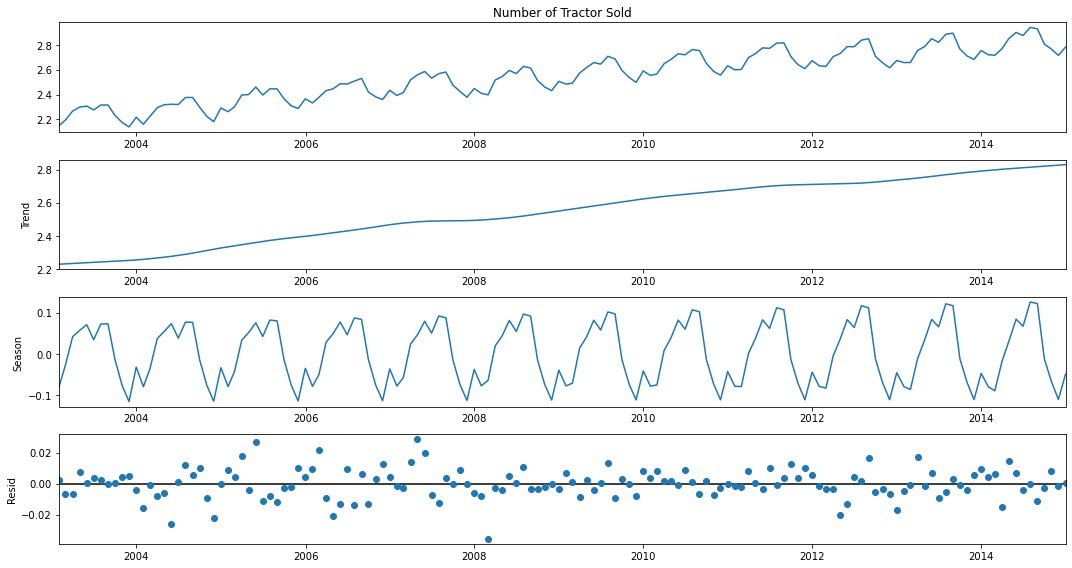

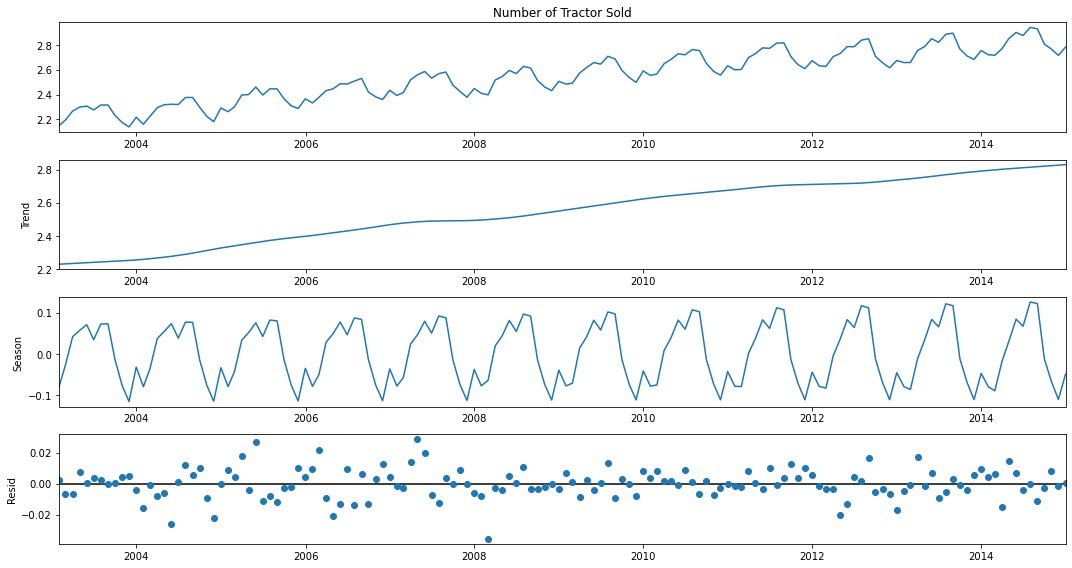

In [25]:
decomposition.plot()

## Data split and its significance

In [26]:
ts_train = df[df.index.year <= 2012]
ts_test = df[df.index.year > 2012]

In [27]:
print('test data',ts_test.shape)
print('train data',ts_train.shape)

test data (24, 1)
train data (120, 1)


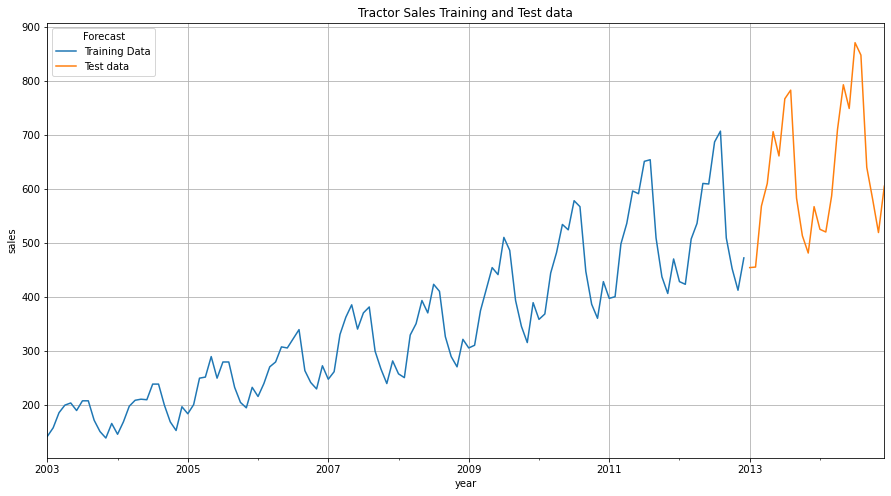

In [28]:
ts_train['Number of Tractor Sold'].plot()

ts_test['Number of Tractor Sold'].plot()

plt.grid()
plt.title('Tractor Sales Training and Test data')
plt.xlabel('year')
plt.ylabel('sales')
plt.legend(['Training Data','Test data'],title='Forecast')



# HOLT-WINTERS

forecast using above method

In [29]:
ts_train_hw = ExponentialSmoothing(ts_train,seasonal='multiplicative',
                                  trend='additive',freq='M')
ts_train_hw_autofit = ts_train_hw.fit(optimized=True)

In [30]:
ts_train_hw_autofit.params_formatted

,name,param,optimized
smoothing_level,alpha,3.694194e-01,True
smoothing_trend,beta,7.423212e-09,True
smoothing_seasonal,gamma,6.305806e-01,True
initial_level,l.0,1.817096e+02,True
initial_trend,b.0,3.959365e+00,True
initial_seasons.0,s.0,7.594210e-01,True
initial_seasons.1,s.1,8.411898e-01,True
initial_seasons.2,s.2,9.710069e-01,True
initial_seasons.3,s.3,1.016946e+00,True
initial_seasons.4,s.4,1.023890e+00,True


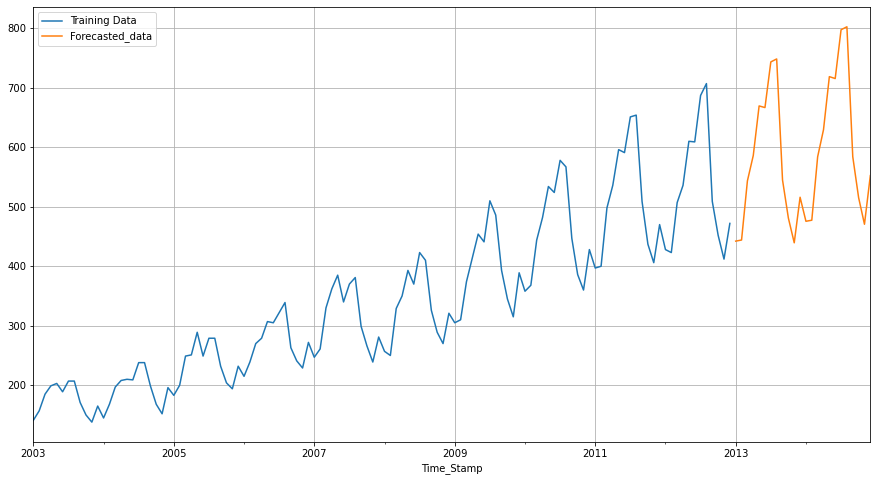

In [31]:
tes_pred = ts_train_hw_autofit.forecast(steps=len(ts_test))
ts_train.plot()
tes_pred.plot()
plt.grid()
plt.legend(['Training Data','Forecasted_data'])

### Forecast and Test Data

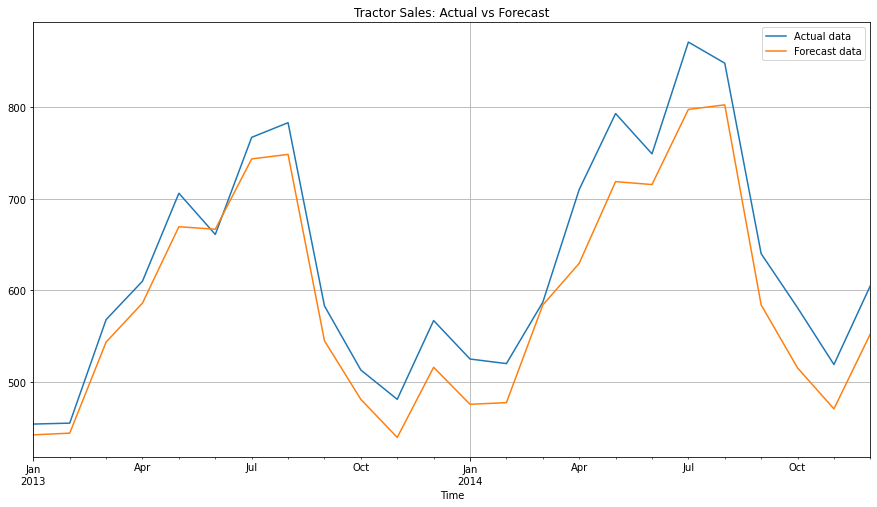

In [32]:
ts_test['Number of Tractor Sold'].plot()
tes_pred.plot()
plt.grid()
plt.title('Tractor Sales: Actual vs Forecast')
plt.xlabel('Time')
plt.legend(['Actual data','Forecast data'])

## MAPE

Using MAPE function

In [33]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100


In [34]:
RMSE = mean_squared_error(ts_test, tes_pred, squared=False)
MAPE = mean_absolute_percentage_error(ts_test['Number of Tractor Sold'],tes_pred)

In [35]:
resultsDF = pd.DataFrame({'Test RMSE':[RMSE],
                         'Test MAPE':[MAPE]},
                        index=['TripleExponentialSmoothing'])

In [36]:
resultsDF

,Test RMSE,Test MAPE
TripleExponentialSmoothing,45.094711,6.350019


# concepts of ARIMA

## NON-STATIONARY TO STATIONARY DATA

In [37]:
dftest = adfuller(ts_train,regression='ct',autolag=None,maxlag=24)

In [38]:
print('DF test statistic is %3.3f' %dftest[0])

print('DF test p-value is',dftest[1])

print('Number of lags used',dftest[2])

DF test statistic is -1.890
DF test p-value is 0.6597097233658525
Number of lags used 24


### Dickey-Fuller test

In [39]:
ts_train_log = np.log10(ts_train)


In [40]:
dftest = adfuller(ts_train_log,regression='ct',autolag=None,maxlag=24)

In [41]:
print('DF test statistic is %3.3f' %dftest[0])

print('DF test p-value is',dftest[1])

print('Number of lags used',dftest[2])

DF test statistic is -1.232
DF test p-value is 0.9038339962934361
Number of lags used 24


*ACF* and *PACF* using log transformed data points

/Users/amithmg/opt/anaconda3/envs/dsml/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


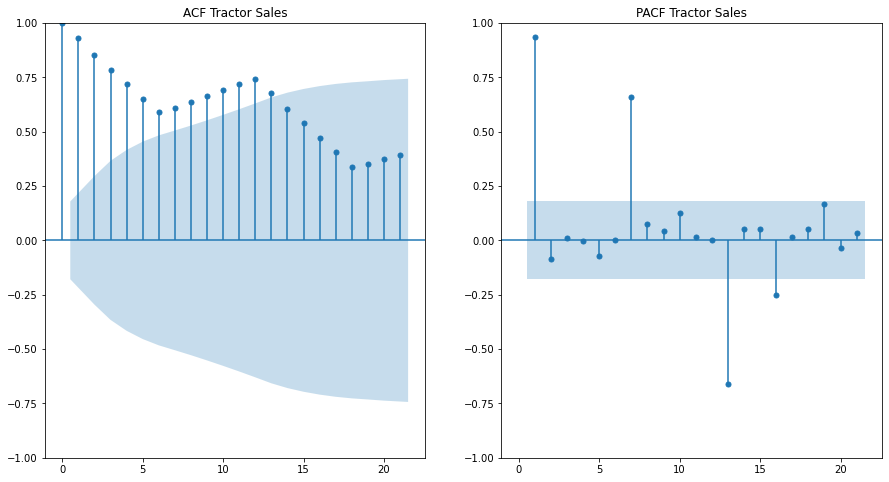

In [48]:
f,a = plt.subplots(1,2,sharex=True, sharey=False,squeeze=False)

plot_0 = plot_acf(ts_train_log,title='ACF Tractor Sales',ax=a[0][0])

plot_1 = plot_pacf(ts_train_log,title='PACF Tractor Sales',zero=False,ax=a[0][1])

## SARIMA (p,d,q)(P,D,Q)[m]:

In [67]:
import itertools

p=range(0, 3)

q=range(0, 3)

d=range(1, 2)

pdq=list(itertools.product(p,d,q))
model_pdq = [(x[0],x[1],x[2], 12) for x in list(itertools.product(p,d,q))]

# Define an empty data frame to store the parameter values along with the model AIC

for param in pdq:
    for param_seasonal in model_pdq:
        try:
            sarima_model = sm.tsa.statespace.SARIMAX(ts_train_log['Number of Tractor Sold'].values,
                                        order=param,
                                        seasonal_order=param_seasonal)
            results_sarima = sarim_model.fit()
        except:
            continue
            print('SARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results_sarima.aic))
            
            sarima_aic = sarima_aic.append({'Param':param,
                                            'seasonal':param_seasonal,
                                            'AIC':results_sarima.aic}, 
                                           ignore_index=True)



In [68]:
sarima_aic.sort_values(by=['AIC']).head()

,param,seasonal,AIC
